In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# ground truth model
N, R = 41, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 4*np.random.randn(*data.shape) # add noise

In [16]:
results = tt.fit_ensemble(data, range(1, 9), replicates=3, method=tt.cp_crossval, p_holdout=.4)

Optimizing rank-1 models.
   3/3 converged, min error = 0.9615, max error = 0.9676, mean error = 0.9655, time to fit = 0.3374s
Optimizing rank-2 models.
   3/3 converged, min error = 0.9306, max error = 0.9605, mean error = 0.9448, time to fit = 0.6360s
Optimizing rank-3 models.
   3/3 converged, min error = 0.9074, max error = 0.9270, mean error = 0.9147, time to fit = 0.6596s
Optimizing rank-4 models.
   3/3 converged, min error = 0.9055, max error = 0.9079, mean error = 0.9066, time to fit = 0.9367s
Optimizing rank-5 models.
   3/3 converged, min error = 0.9027, max error = 0.9213, mean error = 0.9091, time to fit = 0.8884s
Optimizing rank-6 models.
   3/3 converged, min error = 0.9006, max error = 0.9188, mean error = 0.9075, time to fit = 0.8361s
Optimizing rank-7 models.
   3/3 converged, min error = 0.8977, max error = 0.9007, mean error = 0.8989, time to fit = 1.0844s
Optimizing rank-8 models.
   3/3 converged, min error = 0.8948, max error = 0.8971, mean error = 0.8962, time t

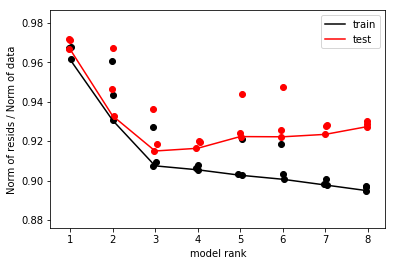

In [17]:
ax = tt.plot_error(results, partition='train',
                   line_kw=dict(c='k', label='train'), scatter_kw=dict(c='k'));
tt.plot_error(results, partition='test', ax=ax,
              line_kw=dict(c='r', label='test'), scatter_kw=dict(c='r'));
plt.legend()